# Housing Regression Kaggle Competition
This is a notebook for my submissions for the following [Kaggle Competition](https://www.kaggle.com/c/house-prices-advanced-regression-techniques). 

## Project Description
Given 79 features about residential homes in Iowa (as well as their sale prices), how accurately can we predict their sale prices?

## Data
We are given two files. $\texttt{train.csv}$ from which our model is trained on, and $\texttt{test.csv}$ from which we make predictions that are submitted. 

## Evaluation
From the list of predicted house prices, our predictions will be scored by taking the RMSE between the logarithm of the predicted sales price and the logarithm of the observed sales price.

## Other
This notebook is meant to be a summary of all my work. The final version of allfiles used can be found [here](https://github.com/fattorib/KaggleHousingRegression).

# Exploratory Data Analysis
Here, we take a first look at $\texttt{train.csv}$. 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
pd.options.display.max_rows = 200
pd.options.display.max_columns = 200

In [2]:
file_path = 'train_fix.csv'
raw_df = pd.read_csv(file_path)
#Getting price data for training
prices = raw_df['SalePrice']
attributes_with_price = raw_df

## Missing Data


In [3]:
missing = attributes_with_price.isnull().sum().sort_values(ascending=False)
percent = (attributes_with_price.isnull().sum()/attributes_with_price.isna().count()).sort_values(ascending=False)
missing_data = pd.concat([missing, percent], axis=1, keys=['Total', 'Percent'])

In [4]:
missing_data

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


From this we can see that there are many attributes that are missing. While we will not deal with these missing values now, we will come back to these later during our feature engineering stage when we decide how to deal with them.

## Price Distribution

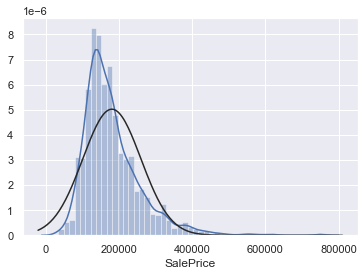

In [5]:
from scipy.stats import norm
%matplotlib inline
sns.distplot(prices,fit = norm)

The price distribution is heavily skewed. Moving forward, we will need to apply a tranformation (most likely logarithmic) to this data. 

## Data Types

Looking at $\texttt{train.csv}$, we see that the features are a mix of numerical (Square footage of floors, etc), categorical (Neighbourhood, building type, etc), and ordinal (quality of exterior, quality of basement, etc). We will have to encode the categorical and ordinal features separately. 

## Numerical Features
The following are a list of all numerical features. 


In [6]:
numerical_features = ['SalePrice','LotFrontage','LotArea','MasVnrArea','BsmtFinSF1',
                      'BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea',
                      'BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr',
                      'TotRmsAbvGrd','Fireplaces','GarageCars','GarageArea','WoodDeckSF','OpenPorchSF',
                      'EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea']

Let's take a look at some of the distributions of these values. Like 'SalePrice', some of them may be skewed. 

C:\Users\Ben\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\Ben\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\Ben\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\Ben\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\Ben\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\Ben\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidt

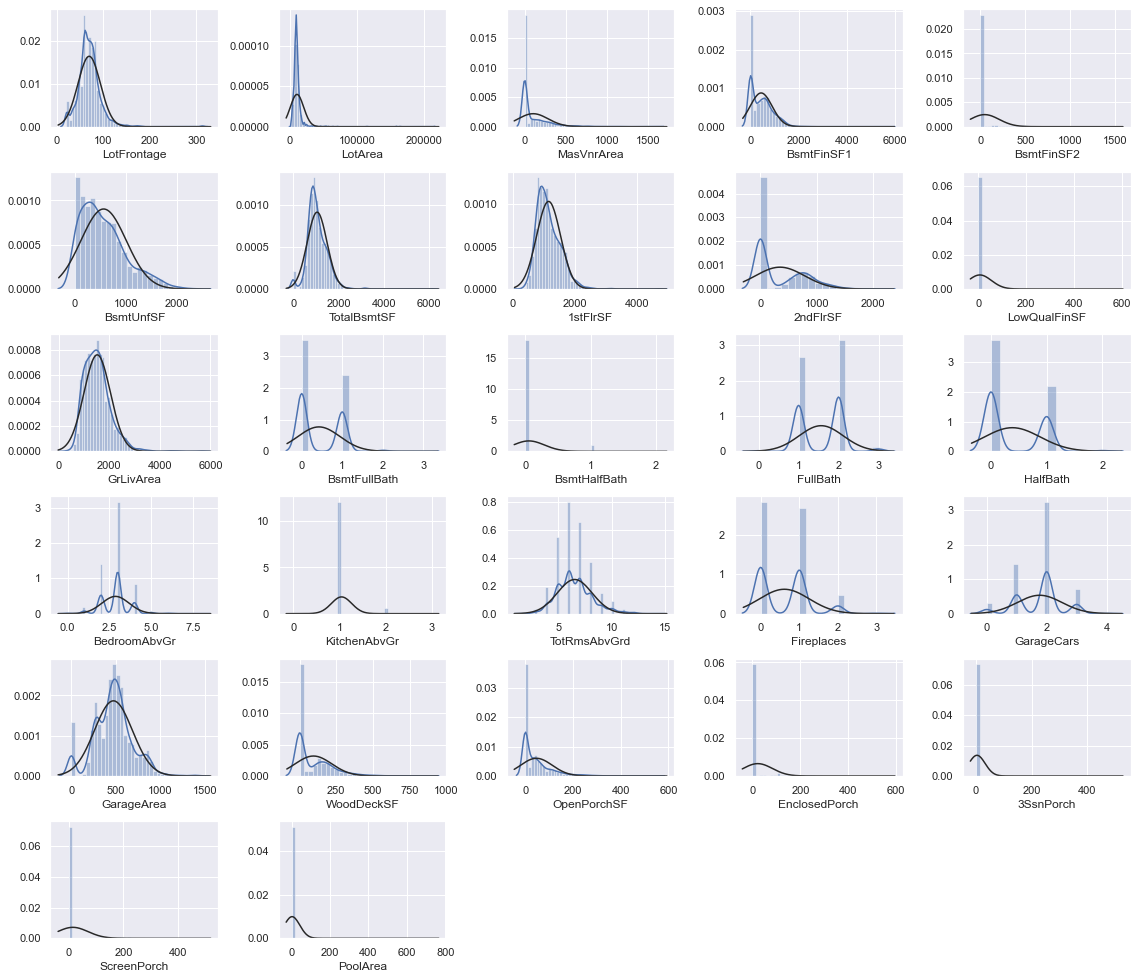

In [7]:
%matplotlib inline
fig = plt.figure(figsize=(16,20))
for i in range(len(numerical_features)-1):
    fig.add_subplot(9, 5, i+1)
    feat = numerical_features[i+1]
    sns.distplot(attributes_with_price[feat],fit = norm)
plt.tight_layout()
plt.show()

Many of these distributions are skewed. Before feeding this data to a model, we will need to apply suitable transformations to these features.

## Categorical Features
The following are a list of all categorical features.


In [8]:
categorical_features = ['MSSubClass', 'MSZoning','Street','Alley','LotShape','LandContour','Utilities',
                        'LotConfig','LandSlope','Neighborhood','Condition1','Condition2','BldgType',
                        'HouseStyle','RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType',
                        'Foundation','BsmtFinType1','BsmtFinType2','Heating','Electrical','Fence',
                        'MiscFeature','SaleType','SaleCondition']

Something to note is that while $\texttt{MSSubClass}$ takes numerical values, it is actually a categorical feature! We will need to watch out for this later. 

## Ordinal Features
Finally, a list of all the ordinal features. These are mostly just quality ratings for different features of the house. 

In [9]:
ordinal_features = ['YearBuilt','YearRemodAdd','OverallQual','OverallCond','ExterQual','ExterCond','BsmtQual','BsmtCond','BsmtExposure',
                    'HeatingQC','KitchenQual','Functional','FireplaceQu','GarageQual','GarageCond','PoolQC']

## Other groupings
Alternatively, we can group features by what they are describing. For example, we could consider all basement features, garage features, or area features.


In [10]:
basement_features = ['SalePrice','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinSF1','BsmtFinType2',
                     'BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','BsmtFullBath','BsmtHalfBath']
garage_features = ['SalePrice','GarageType','GarageYrBlt','GarageFinish','GarageCars','GarageArea',
                   'GarageQual','GarageCond']
area_features = ['SalePrice','LotFrontage','LotArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF',
                 'LowQualFinSF','GrLivArea','WoodDeckSF','OpenPorchSF']

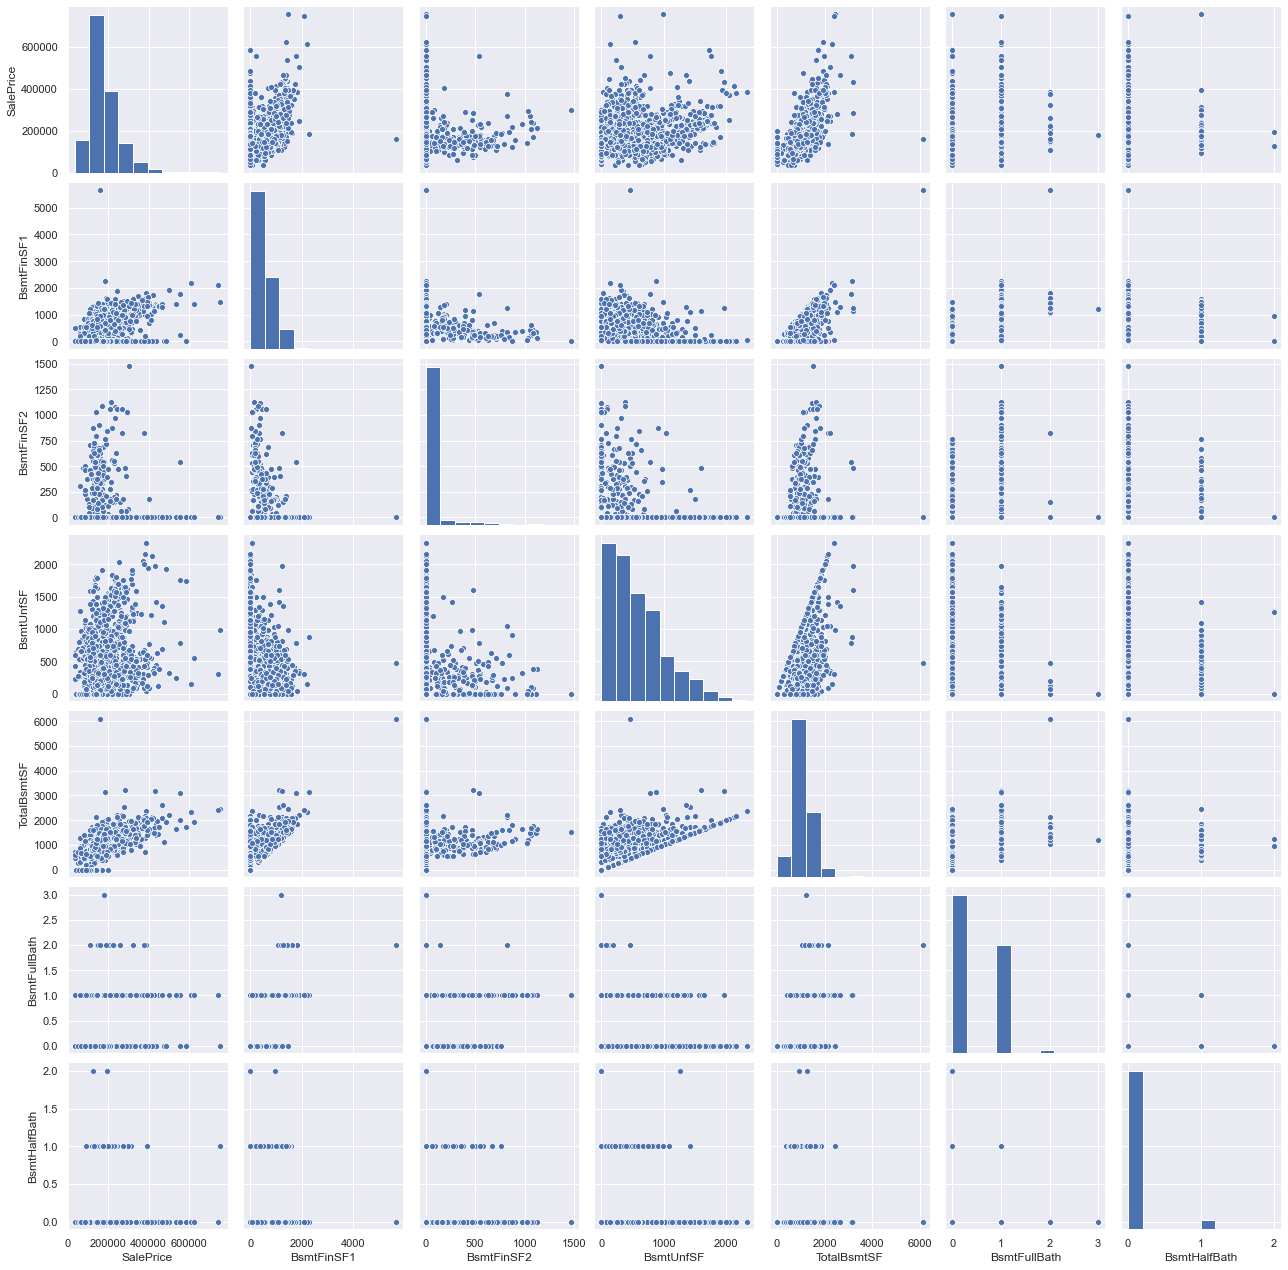

In [11]:
%matplotlib inline
basement_df = attributes_with_price[basement_features]
sns.pairplot(basement_df)

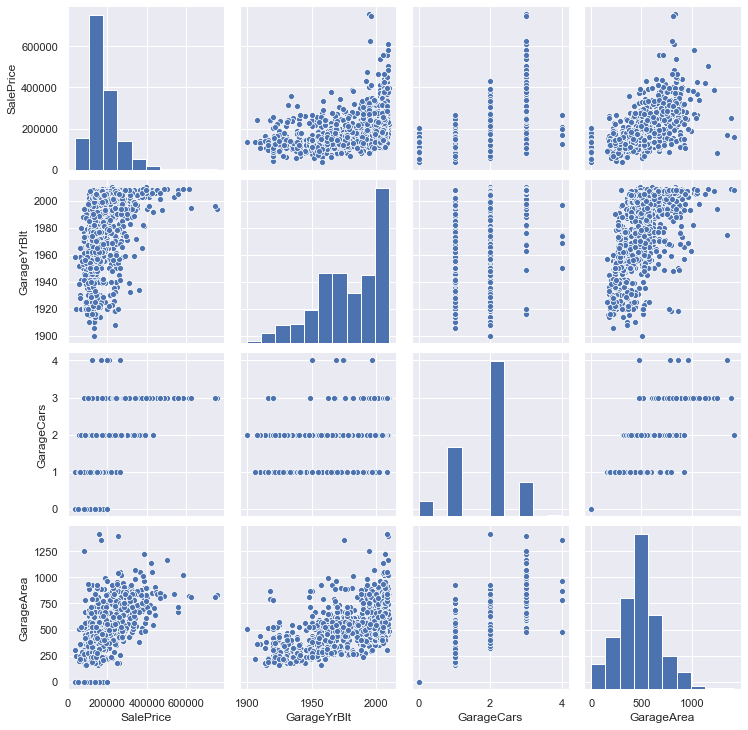

In [12]:
%matplotlib inline
garage_df = attributes_with_price[garage_features]
sns.pairplot(garage_df)

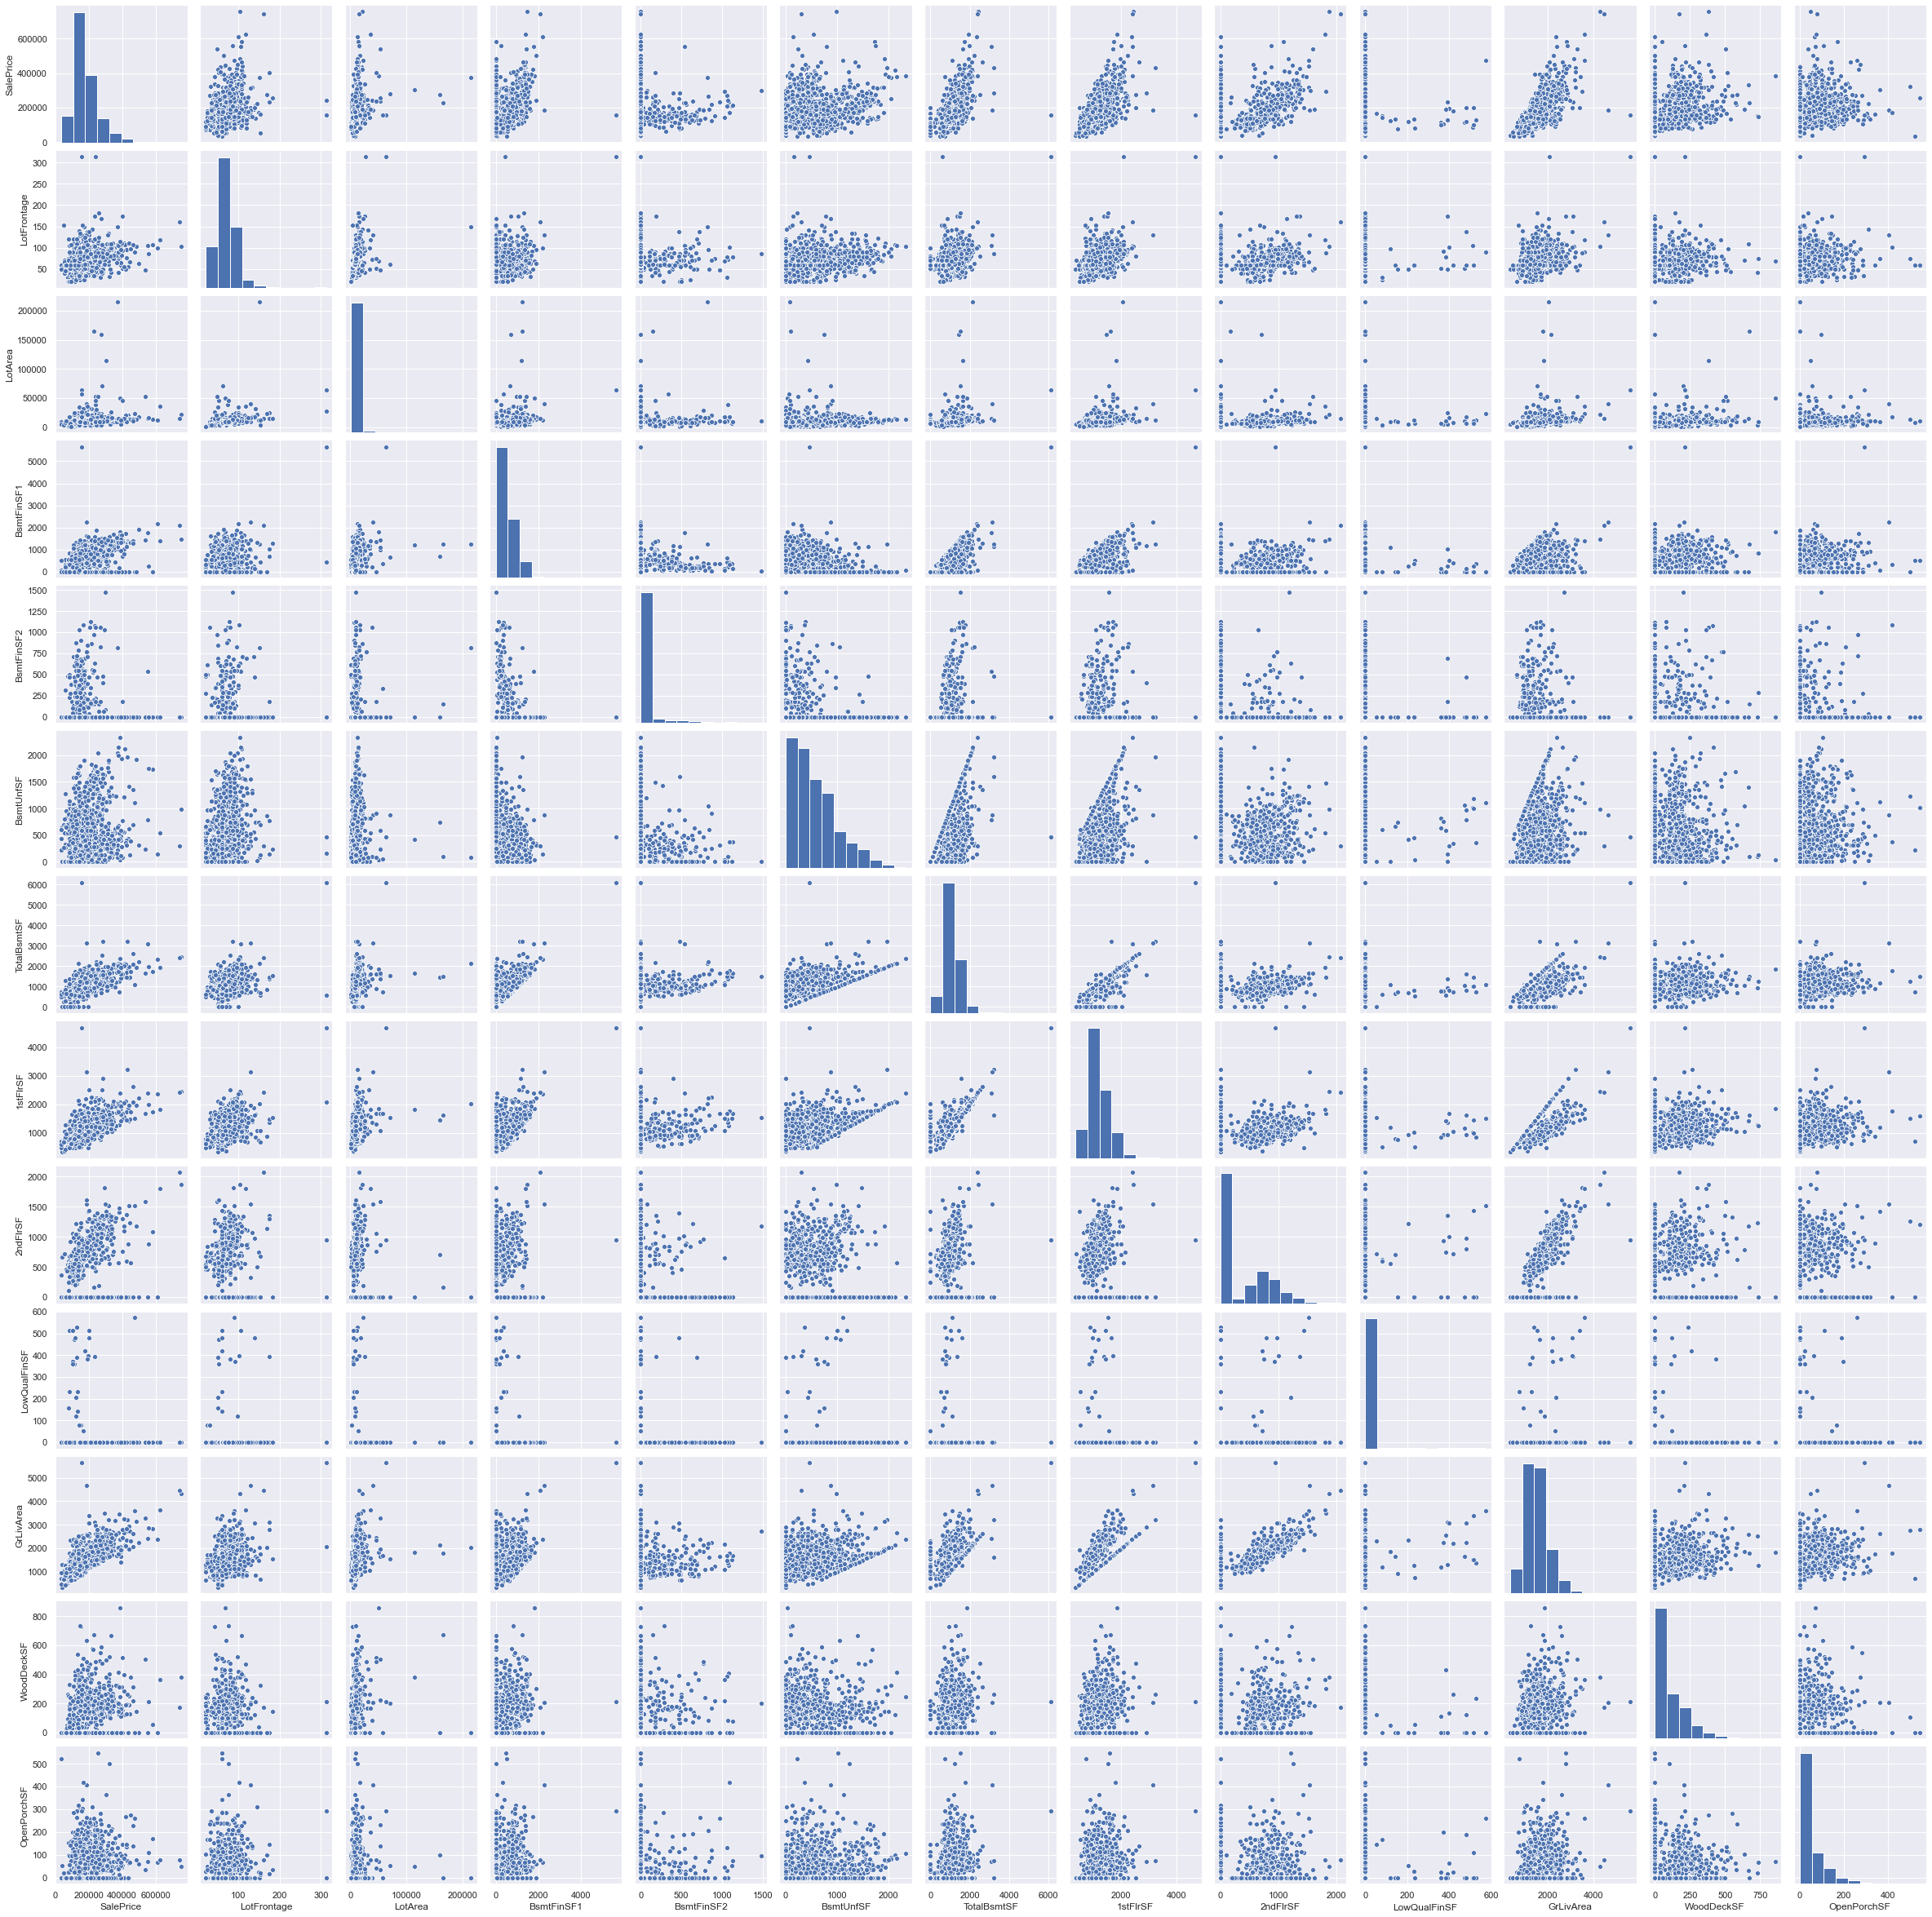

In [13]:
%matplotlib inline
area_df = attributes_with_price[area_features]
sns.pairplot(area_df)

Just from looking at these plots, we see that there is appears to be linear or exponential relations between some of the area features and the sale price. This is a good sign and means that these might be important features for use to use!

## Is there any relation between month or year sold?


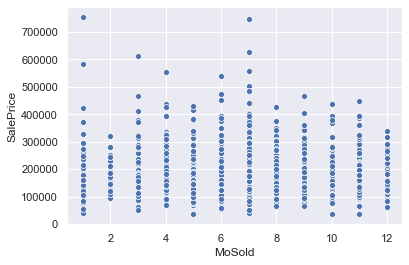

In [14]:
%matplotlib inline
sns.scatterplot(attributes_with_price['MoSold'],attributes_with_price['SalePrice'])

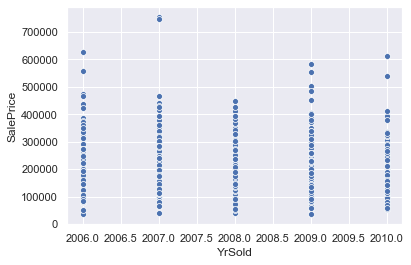

In [15]:
%matplotlib inline
sns.scatterplot(attributes_with_price['YrSold'],attributes_with_price['SalePrice'])

Doesn't look like it. We'll drop these features soon. 

# Feature Engineering
Now we can move to the feature engineering stage. Partially motivated by the above exploration, we need to do the following: 
1. Deal with all missing values 
2. Fix the skewed sale price
3. Encode all categorical and ordinal features
4. Perform some type of feature selection
5. Create new features
6. Normalize numerical features for better model performance

## Missing values
There are a total of $19$ features missing entries. The percentages of missing entries ranges from less than $1\%$ (Electrical) to $99\%$ (PoolQC). 

Since we are performing feature selection at a later stage, we should opt to keep as many features as we can for now. For the categorical features that have missing values, we impute by taking the mode of the feature for all houses in the same neighbourhood. 

In [16]:
attributes_with_price['Electrical'] = attributes_with_price.groupby('Neighborhood')['Electrical'].transform(lambda x: x.fillna(x.mode()[0]))
attributes_with_price['KitchenQual'] = attributes_with_price.groupby('Neighborhood')['KitchenQual'].transform(lambda x: x.fillna(x.mode()[0]))
attributes_with_price['Exterior1st'] = attributes_with_price.groupby('Neighborhood')['Exterior1st'].transform(lambda x: x.fillna(x.mode()[0]))
attributes_with_price['Exterior2nd'] = attributes_with_price.groupby('Neighborhood')['Exterior2nd'].transform(lambda x: x.fillna(x.mode()[0]))
attributes_with_price['Functional'] = attributes_with_price.groupby('Neighborhood')['Functional'].transform(lambda x: x.fillna(x.mode()[0]))
attributes_with_price['MSZoning'] = attributes_with_price.groupby('Neighborhood')['MSZoning'].transform(lambda x: x.fillna(x.mode()[0]))
attributes_with_price['SaleType'] = attributes_with_price.groupby('Neighborhood')['SaleType'].transform(lambda x: x.fillna(x.mode()[0]))
attributes_with_price['Utilities'] = attributes_with_price.groupby('Neighborhood')['Utilities'].transform(lambda x: x.fillna(x.mode()[0]))

For the other features that have missing values, we impute them based off context. For example, the houses missing values for TotalBsmtSF are houses that do not have basements. We can impute these missing values with $0$. For all remaining features, we follow a similar pattern to this. 

In [17]:
general_missing_NA= ['FireplaceQu','PoolQC','Fence','MiscFeature',
                             'Alley']
        
for feature in general_missing_NA:
    attributes_with_price[feature] = attributes_with_price[feature].fillna('NA')
        
basement_missing_zero = ['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
                            'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath']
        
for feature in basement_missing_zero:
    attributes_with_price[feature] = attributes_with_price[feature].fillna(0)
        
        
basement_missing_none = ['BsmtQual', 'BsmtCond', 'BsmtExposure', 
                                 'BsmtFinType1', 'BsmtFinType2']
        
for feature in basement_missing_none:
    attributes_with_price[feature] = attributes_with_price[feature].fillna('NA')
        
        
garage_missing_zero = ['GarageYrBlt', 'GarageArea', 'GarageCars']
        
for feature in garage_missing_zero:
    attributes_with_price[feature] = attributes_with_price[feature].fillna(0)
        
garage_missing_none = ['GarageType', 'GarageFinish', 'GarageQual', 
                               'GarageCond']
        
for feature in garage_missing_none:
    attributes_with_price[feature] = attributes_with_price[feature].fillna('NA')

## Fixing the skewed sales price
As mentioned in the previous section, we apply a $\log$ transform to de-skew the sales price data. 

In [18]:
prices = attributes_with_price['SalePrice']
attributes = attributes_with_price
#attributes = attributes_with_price.drop(['SalePrice'],axis = 1)

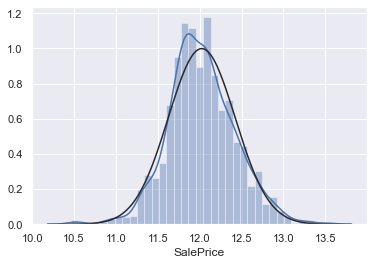

In [19]:
prices = np.log(prices)
%matplotlib inline
sns.distplot(prices,fit = norm)

That looks way better! We just need to remember to take the exponential of our final predicted sale prices when submitting.

## Encoding Features
### 1. Ordinal Features
First, we do a label encoding on all ordinal features. The list of ordinal features we have kept is:

In [20]:
ordinal_features = ['GarageFinish','GarageQual','GarageCond','BsmtExposure','OverallQual','OverallCond','ExterQual','ExterCond',
                        'HeatingQC','KitchenQual','Functional','BsmtFinType1','BsmtFinType2','BsmtQual','BsmtCond']

In [21]:
from sklearn.preprocessing import LabelEncoder

for feature in ordinal_features:
    #initialize new instance of labelencoder
    le = LabelEncoder()
    le.fit(attributes[feature])
    attributes[feature] = le.transform(attributes[feature])

### 2. Categorical Features
Recall the list of categorical features we have:

In [22]:
categorical_features = ['MSZoning','Street','LotShape','LandContour','Utilities',
                        'LotConfig','LandSlope','Neighborhood','Condition1','Condition2','BldgType',
                        'HouseStyle','RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType',
                        'Foundation','Heating','Electrical','CentralAir','PavedDrive','SaleType',
                        'SaleCondition']

We use one-hot encoding to handle all these values. The code for this is a bit long and all of these transformations are implemented in featurepipeline.py. 

## Outlier Removal
Here, we detect outliers in the the numerical features.

In [23]:
numerical_features = ['LotFrontage','LotArea','MasVnrArea','BsmtFinSF1',
                      'BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea',
                      'BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr',
                      'TotRmsAbvGrd','Fireplaces','GarageCars','GarageArea','WoodDeckSF','OpenPorchSF',
                      'EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea']

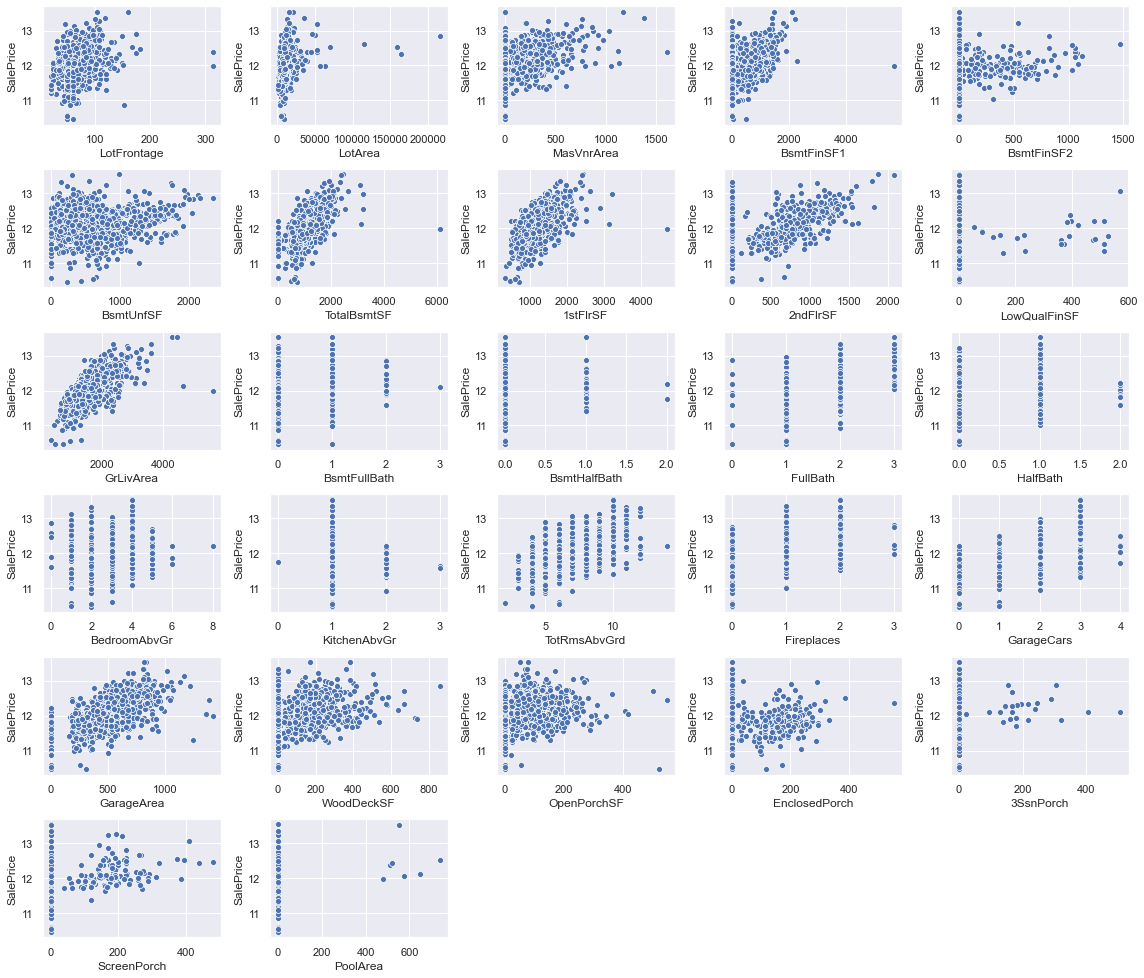

In [24]:
%matplotlib inline
fig = plt.figure(figsize=(16,20))
for i in range(len(numerical_features)):
    fig.add_subplot(9, 5, i+1)
    feat = numerical_features[i]
    sns.scatterplot(attributes[feat],prices)

plt.tight_layout()
plt.show()

There are definetly some weird results in here. For example:
1. The two properties with highest 'GrLivArea' do not have anything close to the highest price.
2. There are properties with very large basement square footage, yet they do not follow the trend of increasing price.

If we look into these a bit more, we find the following [paper](http://jse.amstat.org/v19n3/decock.pdf) by Professor Dean De Cock who originally sourced this data. In this paper, he notes the following (when discussing outliers):

"...Three of them are true outliers (Partial Sales that likely don’t represent actual market values) and two of them are simply unusual sales (very large houses priced relatively appropriately). I would recommend removing any houses with more than 4000 square feet from the data set (which eliminates these five unusual observations)"

These fives houses occur in both the train and test set. Their ID's are: 524, 692,1183, 1299, 2550.

For the houses occuring in the training data, only two truly represent true outliers. As such, we remove indices 524 and 1299 from our data.


For the house occuring in the test set, we impute its Lot and Gr values with the median value.

In [25]:
bad_indices = [524,1299,1183,692]
attributes = attributes[~attributes['Id'].isin(bad_indices)]

In [26]:
#Dropping index
attributes = attributes.drop(['Id'],axis = 1)
prices = np.log1p(attributes['SalePrice'])
attributes_prices = attributes
attributes_prices['SalePrice'] = np.log1p(attributes_prices['SalePrice'])
attributes = attributes.drop(['SalePrice'],axis = 1)

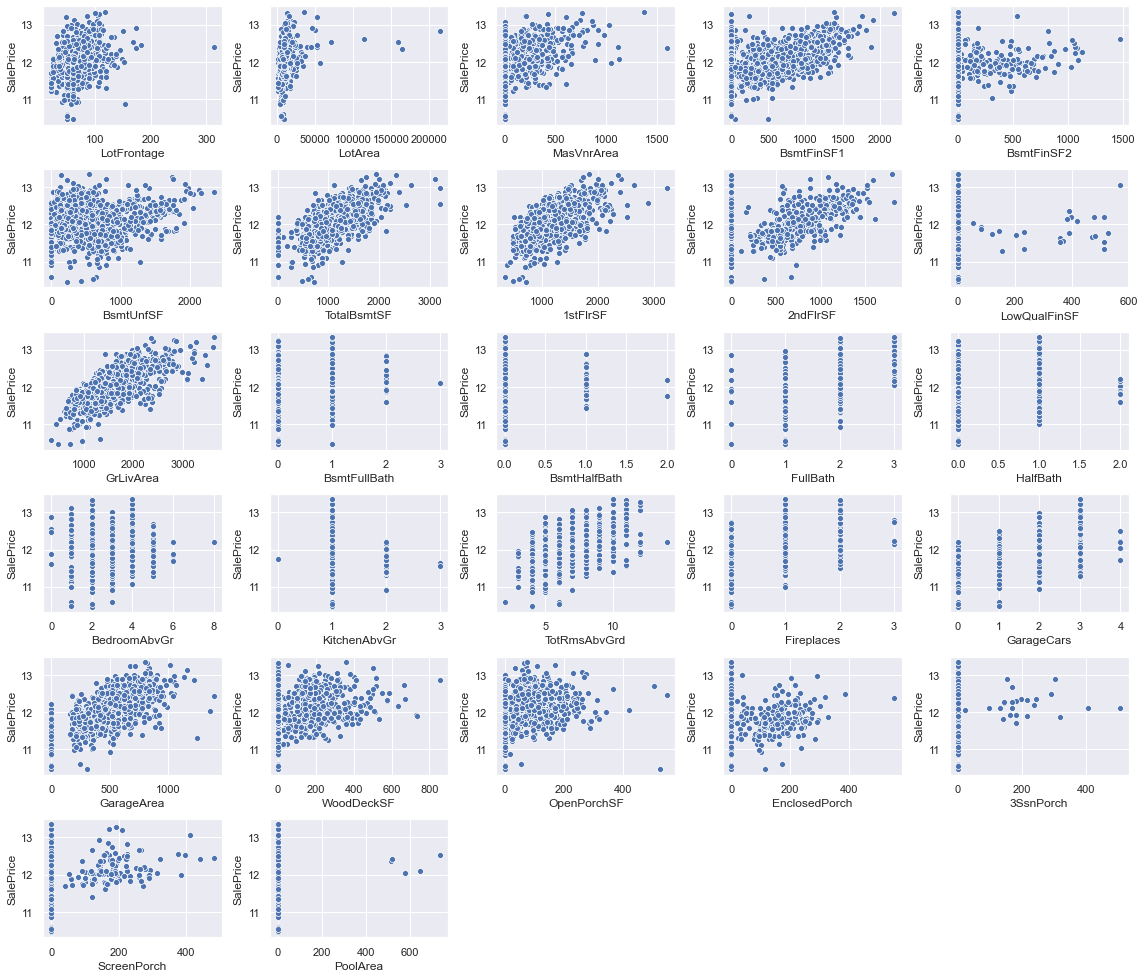

In [27]:
%matplotlib inline
fig = plt.figure(figsize=(16,20))
for i in range(len(numerical_features)):
    fig.add_subplot(9, 5, i+1)
    feat = numerical_features[i]
    sns.scatterplot(attributes[feat],prices)

plt.tight_layout()
plt.show()

That looks better!

## Feature Creation
There are some features we can create that hopefully be more descriptive.

In [28]:
attributes['TotalSF'] = attributes['TotalBsmtSF'] + attributes['1stFlrSF'] + attributes['2ndFlrSF']
attributes['PorchSF'] = attributes['OpenPorchSF'] + attributes['3SsnPorch'] + attributes['EnclosedPorch'] + attributes['ScreenPorch'] + attributes['WoodDeckSF']
attributes['TotalBath'] = attributes['BsmtFullBath'] + attributes['FullBath'] + 0.5*attributes['BsmtHalfBath'] + 0.5*attributes['HalfBath']
attributes['RemodSum']= attributes['YearRemodAdd'] + attributes['YearBuilt']

Another option is to create polynomial features. I experimented with creating 2nd order features from the top most correlated features but this did not improve model performance, and instead increased the overfitting.

## Feature Transformation
As we discovered above during our EDA, many of the numerical distributions are either positively or negatively skewed. After experimenting with different transformations, the following sequence was the most promising:
1. Applying a Box-Cox transform to all numerical features with $\lambda = 0.7$
2. Applying a $\log(x+1)$ transform to '3SsnPorch', 'LowQualFinSF', 'BsmtHalfBath','KitchenAbvGr', 'ScreenPorch', 'BsmtFinSF2', 'EnclosedPorch', 'MasVnrArea', '2ndFlrSF', 'WoodDeckSF','HalfBath', 'OpenPorchSF', 'BsmtFullBath', 'Fireplaces'               
3. Applying an $x^2$ transform to 'RemodSum','GarageCars','GarageArea'

## Feature Selection
We performed feature selection by selecting all features had an absolute correlation coefficient (with the target price) greater than a defined threshold (0.1 seemed to be the optimal value). 

With these selected featues, we then examined them all for collinearity. For any pair of features that were strongly correlated (greater than 0.825), the one that was less correlated with the target was dropped. This ensures good model performance, especially with the linear models we are using. 

## Feature Scaling
The last step we take before experimenting with some models is feature scaling. We do this since different features values take quite different ranges. By scaling the features, we are giving them all the same range, this is especially important when using models involving regularization. 

I ended up experimenting with the three inlcuded feature scalers including with Scikit-learn, MinMaxScaler,StandardScaler, and RobustScaler. In the end, a combination of StandardScaler and MinMaxScaler performed the best

## Feature Pipeline
While we have explained all the transformations and engineering we have done to the data, it is very inefficient. Having multiple files to handle each dataset means that they quickly become out of sync. Instead, we create a feature pipeline which will handle all datasets automatically. 

In summary, we have:
1. Loaded a data set and identified the numerical, ordinal, and categorical features
2. Imputed missing values
3. Encoded all categorical and ordinal features
4. Removed outliers
5. Performed feature selection
6. Applied promising transformations to skewed numerical features
7. Removed all (highly) collinear features
8. Scaled all features 

Using Scikit-Learn, we are easily able to create custom transformers that handle all the above steps. We can then combine them into a pipeline to handle all incoming data. 

In [29]:
import pandas as pd
from sklearn.pipeline import Pipeline

import numpy as np

#Custom pipeline imports
from featurepipeline import FeaturePruner
from featurepipeline import CategoricalTransformer
from featurepipeline import CustomImputer
from featurepipeline import OrdinalTransformer
from featurepipeline import FeatureCreator  
from featurepipeline import PolynomialFeatureCreator 
from featurepipeline import OutlierPruner
from featurepipeline import PriceSplitter 
from featurepipeline import FeatureSelector
from featurepipeline import FeatureTransformer
from featurepipeline import DropHighCorr

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [30]:
#This is the pipeline we use for partially cleansing the data. The remaining
#pipeline continues below
numerical_pipeline = Pipeline([
('imputer', CustomImputer()),
('CategoricalEncoder', CategoricalTransformer()),
('OrdindalEncoder', OrdinalTransformer()),
('FeaturePruner', FeaturePruner()),
('FeatureCreation', FeatureCreator())
])

Customer Imputer initialized
Feature Pipeline!


In [31]:
#Loading training data
file_path = 'train_fix.csv'
raw_train = pd.read_csv(file_path)

X_train = numerical_pipeline.fit_transform(raw_train)

#Remaining feature pipeline
OP = OutlierPruner(train_data=True)
PS = PriceSplitter(train_data=True)
FT = FeatureTransformer()
MM = MinMaxScaler()
SS = StandardScaler()

FS = FeatureSelector(train_data=True, corr_val = 0.05)
DHC = DropHighCorr(train_data=True,threshold = 0.825)


X_train = OP.fit_transform(X_train)
X_train,feature_select = FS.fit_transform(X_train)


X_train,y_train = PS.fit_transform(X_train)
X_train= FT.fit_transform(X_train)
X_train,feature_highcorr = DHC.fit_transform(X_train)

column_vals = X_train.columns


X_train= SS.fit_transform(X_train)
X_train = MM.fit_transform(X_train)


C:\Users\Ben\Anaconda3\lib\site-packages\sklearn\utils\validation.py:510: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  "pandas.DataFrame with sparse columns found."
C:\Users\Ben\Anaconda3\lib\site-packages\sklearn\utils\validation.py:510: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  "pandas.DataFrame with sparse columns found."


In [32]:
#Loading test data
file_path = 'test_fix.csv'
raw_test = pd.read_csv(file_path)

X_submission_data = numerical_pipeline.transform(raw_test)

OP = OutlierPruner(train_data=False)
PS = PriceSplitter(train_data=False)
FT = FeatureTransformer()
FS = FeatureSelector(train_data=False, corr_val = 0.05, features=feature_select)
DHC = DropHighCorr(train_data=False, threshold = 0.825,features = feature_highcorr)



X_submission_data = OP.fit_transform(X_submission_data)
X_submission_data = FS.fit_transform(X_submission_data)

X_submission_data,Id_df = PS.fit_transform(X_submission_data)
X_submission_data= FT.fit_transform(X_submission_data)
X_submission_data = DHC.fit_transform(X_submission_data)
X_submission_data= SS.transform(X_submission_data)
X_submission_data = MM.transform(X_submission_data)

C:\Users\Ben\Anaconda3\lib\site-packages\sklearn\utils\validation.py:510: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  "pandas.DataFrame with sparse columns found."


Another benefit of writing our feature engineering to a pipeline is that it allows us to implement feature engineering decisions as hyperparameters. For example, we now have the following hyperparameters:
1. The transforms to de-skew numerical features
2. Correlation coefficient cutoffs
3. Types of feature creation
We also use the following helper functions for scoring and creating submissions:

In [33]:
#Helper Functions
def submission_creator(model,name):
    
    prediction_array = model.predict(X_submission_data)

    housing_prices =  {'Id': Id_df, 'SalePrice':np.exp(prediction_array) }
    df = pd.DataFrame(housing_prices, columns = ['Id', 'SalePrice'])
    
    submission_title = 'Submission' + name
    df.to_csv(submission_title+ '.csv',index = False)
    print('Submission Created!')


def display_scores(scores):
    # print(scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())


from sklearn.model_selection import cross_val_score

def model_scorer(model):
    scores = cross_val_score(model, X_train, y_train,
    scoring="neg_mean_squared_error", cv=10)
    rmse_scores = np.sqrt(-scores)
    # display_scores(rmse_scores)
    return (rmse_scores.mean(),rmse_scores.std())



# Models
Here, we summarize the most promising models: Regularized Linear Regression, XGBoost, and Scikit-learn's Gradient Boosting Decision Tree. 

## Linear Models
For the regularized linear models, we implemented Lasso and Ridge regression. We use GridSearchCV to find the optimal parameter $\alpha$ for both of these models. ElasticNet was also implemented but optimization always led it to become Lasos regression. 

## Decision Tree Models
We implemented all three of XGBoost, Random Forest, and Scikit-learn's Gradient Boosting Regressor. Out of all models tried, Random Forest consistently performed the worst by far. When comparing cross validation  RMSE scores, our optimized Random Forest always had a higher RMSE (by about 0.01 on average). As such, moving forward we only focused on the other two models. 

Running GridSearchCV on a larger parameter space yielded great results for both methods which XGBoost outperforming GradientBoostingRegressor. Important to note is that the optimized XGBoost model had a significantly lower variance than GradientBoostingRegressor. This is especially important as all of the models will overfit to the training data to some extent. Keeping this variance as low as possible is crucial for a good score on the test data. 

## Stacked Models
In the end, the best model was a stack of optimized XGBoost, Ridge regression and Lasso regression models. I also experimented with a model taking the average predictions over the above three models and while this ensemble outperformed any one of the models on their own, it fell short of the stacked model. Having an ensemble model perform the best is no surprise. By combining three diverse models which all make different types of errors, we are able to reduce the total model variance and increase our predictive power.

Below is a summary of all models and their top scores:

In [34]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
import xgboost as xgb
from sklearn.ensemble import StackingRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.model_selection import GridSearchCV

In [35]:
means = []
stds = []
models = ['Lasso','Ridge','GBDT','XGB','Stacking','Averaging']

#Optimization for regularization hyperparam
params= {"alpha": np.linspace(0.0002,3,500)}
lr_lasso = Lasso(max_iter=10000)
lasso_grid = GridSearchCV(lr_lasso, param_grid=params, scoring = 'neg_root_mean_squared_error', cv=5,n_jobs=-1)
lasso_grid.fit(X_train, y_train)
lr_lasso.set_params(**lasso_grid.best_params_)
mean,std = model_scorer(lr_lasso)
means.append(mean)
stds.append(std)

#Optimization for regularization hyperparam
lr_ridge = Ridge(max_iter=10000)
ridge_grid = GridSearchCV(lr_ridge, param_grid=params, scoring = 'neg_root_mean_squared_error', cv=5,n_jobs=-1)
ridge_grid.fit(X_train, y_train)
lr_ridge.set_params(**ridge_grid.best_params_)
mean,std = model_scorer(lr_ridge)
means.append(mean)
stds.append(std)

#GradientBoostingRegressor
params_gb = {'criterion': 'friedman_mse', 'learning_rate': 0.1, 'loss': 'huber', 'max_depth': 3, 'min_samples_split': 4, 'n_estimators': 400}
gb = GradientBoostingRegressor()
gb.set_params(**params_gb)

mean,std = model_scorer(gb)
means.append(mean)
stds.append(std)


#XGBoost
XGB_reg = xgb.XGBRegressor(eval_metric = 'rmse',silent = True)
params_XGB = {'reg_alpha': 0.001, 'eta': 0.03, 'reg_lambda': 0.001, 'max_depth': 4, 'n_estimators': 1000, 'colsample_bytree': 0.6, 'subsample': 0.6}
XGB_reg.set_params(**params_XGB)
mean,std = model_scorer(XGB_reg)
means.append(mean)
stds.append(std)


#Stacked Model
estimators = [
    ('lasso', lr_lasso),
    ('xgb',XGB_reg),
    ('ridge',lr_ridge)
     ]
    
reg = StackingRegressor(estimators=estimators)
mean,std = model_scorer(reg)
means.append(mean)
stds.append(std)

#Averaged Model
vot = VotingRegressor(estimators=estimators)
means.append(mean)
stds.append(std)

#Dataframe comparing all models
dict_df = {'Model':models, 'RMSE':means, 'STD':stds}
df_evaluation = pd.DataFrame(dict_df)
df_evaluation

,Model,RMSE,STD
0,Lasso,0.109791,0.015219
1,Ridge,0.113440,0.017451
2,GBDT,0.118017,0.018189
3,XGB,0.117652,0.014341
4,Stacking,0.106726,0.014997
5,Averaging,0.106726,0.014997


# Summary 
Creating a submission using the above stacked model gives us an RMSE on the test set of 0.12199. This puts us in around the top 13% of submissions. 

## Main Takeaways
In reality of course, this project was a lot more iterative. It's worth summarizing the changes provided the biggest performance increases and the lessons I learned:

### Improving data quality is (usually) more important than model optimization
After spending a lot of time trying to optimizie my models, I learned that this time is better spent trying to improve the quality of the data. Originally, I had more features dropped and only one kind of transform applied to deskew some of the feature distributions. 

Going back to the feature engineering stage and improving the quality of my feature pipeline was much more beneficial than trying to optimize every single model hyperparameter.

### Not dropping features too early
Originally, my feature pipeline dropped about 10 or so more features instead of imputing based on neighbourhood modes. This, in combination with the other improvements discussed below seemed to provide the largest performance boosts.

### Drop collinear features
This was something I added at the end that took my leaderboard score from being in the top 18% to the top 13%. This makes sense as my final stacked model contains two regularized linear models, which operate under the assumption that all features are independant. 

### Data leakage is really common for top leaderboard submissions
Something I noticed when going through Kaggle notebooks for the top submissions was the prevelance of data leakage. Data leakage usually occured by combining the train and test sets and then fitting a feature transformer or imputer on the combined sets. While this may be good for getting a top leaderboard score, it is terrible practice and gives inflated model results.
